# ROC ve AUC:Makine Öğrenmesi Değerlendirme Metrikleri

![confusion matrix](gercek-pozitif-gercek-negatif-yanlis-pozitif-yanlis-negatif.png)

## ROC ve AUC Nedir?

ROC eğrisi,bir sınıflandırma modelinin farklı eşik değerlerinde ne kadar iyi çalıştığını gösteren bir grafiktir.Bu eğri modelin doğru tahminleri(gerçek pozitifler) ile yanlış tahminleri(yanlış pozitif) arasındaki dengeyi gösterir.

AUC ise bu ROC eğrisinin altında kalan alanın hesaplanmasıdır.AUC değeri 0 ila 1 arasında olur:

* AUC=1 Mükkemmel model
* AUC=0.5 Rastgele tahmin yapan model(para atmak gibi)
* AUC=0 Tamamen yanlış tahminler yapan model.(tahminlerin tersi alınarak mükemmel model elde edilebilir)

## ROC Eğrisi Örneği

![ROC](ea9f7143-7b51-47f3-a061-1fd0419b1afb.png)

Yukarıdaki şekilde mavi eğri daha iyi bir sınıflandırıcıyı,kırmızı kesikli cizgi ise rastgele tahmin eden bir sınıflandırıcıyı gösterir.ROC(Receiver Operating Characteristic) eğirisi,bir sınıflandırma modelinin farklı  karar eşikleri altındaki performasnını görselleştirir.X Ekseninde Yanlış Pozitif Oranı (FPR,False Positive Rate),Y ekseninde ise Doğru Pozitif Oranı(TPR,True Positive Rate) çizilir.Örnek olarak sağlıkta pozitif(hasta) ve negatif(sağlıklı) vakaları sınıflandırıyorsak,TPR gerçekten hasta olanların kaçının doğru tahmin edildiği(duyarlılık),FPR ise gerçekte sağlıklı olanların ne kadarının hasta olarak sınıflandırıldığı oranıdır.ROC eğrisinde mavi eğri sol üst köşeye(yüksek TPR,düşük FPR) yaklaştıkça modelin genel performansı artar.Mükemmel bir model,bazı eşik değerinde TPR=1.0 ve FPR=0.0 olduğundan ROC eğrisi sol üst köşeyi (0,1) içeren bir şekil alır.Tamamen rastgele tahmin eden(para atışı gibi) sınıflandırıcıda ROC eğrisi(0,0) ile (1,1) arasında çapraz bir çizgi olur ve bu durumda AUC=0.5tir.

ROC eğrisi altında kalan alan AUC(Are Under the Curve) olarak adlandırılır.AUC, modelin rastgele seçilmiş bir pozitif örneği rastgele seçilmiş bir negatif örnekten daha yüksek skorlaması olasılığına eşdeğerdir.AUC değeri 1'e ne kadar yaklaşırsa modelin pozitif ve negatif örnekleri ayırma kabiliyeti o kadar yüksektir.
Örneğin AUC=1.0 olan mükemmel bir model,her rastgele "hasta" örneğine hastalık ihtimali yüksek, her "sağlıklı" örneğe hastalık ihtimali düşük değer atar. AUC=0.5 ise modelin rastgele tahmin ettiğini gösterir.İdeal bir sınfılandırıcıda AUC=1'e yakın,kötü bir sınıflandırıcıda AUC=0.5'e yakındır.Model 0.5 in altında ise negatif sınıfları ters yorumlayabilcek anlamına gelir

## Örnek 1-) Meme Kanseri Teşhisi(Sağlık)

Sklearn kütüphanesindeki meme kanseri verisetini kullanacaz.Bu veri seti her bir tümor örneği için 30 adet sayısal özellik ve sonuca göre iki sınıf içerir.Hedef(target) değişkeni malign=0,benign=1 değerlerini alır.Bu örnekte rastgele %70 eğitim verisi ile %30 test verisi olarak ayırıp lojistik regresyon modeli ile sınıflandırma yapacz

In [35]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#Veri setini yükle
cancer=load_breast_cancer()
X=cancer.data #Özellikler(30 kolon)
y=cancer.target #Hedef değişken (0=malign,1=benign)

In [36]:
from sklearn.model_selection import train_test_split

#Veriyi eğitim ve test olarak ayır(%70 eğitim, %30 test)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=31)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

#modeli oluştur ve fit et
model=LogisticRegression(max_iter=5000)#max_iter-_>Algoritmanın en fazla kaç iterasyon çalışacağını belirler
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))


#Test verisi için pozitif sınıf olasılıklarını hesapla
y_scores=model.predict_proba(X_test)[:,1]


Confusion Matrix:
[[ 55   7]
 [  3 106]]


model.predict_proba(X_test)[:, 1]-->Test verisindeki her örnek için "benign"(1 sınıfı) olma olasılığını hesaplar.predict_proba çıktısı iki sutunludur.(her sınıf için). [:,1] ile pozitif sınıfın(benign) olasılığını alıyoruz.Bu olasılık değerleri ,ROC eğrisi çiziminde eşiklere göre TPR/FPR hesaplamak için kullanılır

In [37]:
#ROC Eğrisi ve AUC Hesaplama
from sklearn.metrics import roc_auc_score,roc_curve

#ROC eğrisi için FPR,TPR değerlerini hesapla
fpr,tpr,thresholds=roc_curve(y_test,y_scores)
#AUC değerini hesapla
auc=roc_auc_score(y_test,y_scores)
print(f"AUC skoru: {auc:.3f}")


AUC skoru: 0.992


AUC skoru oldukça yüksek.(0.992).Bu modelin neredeyse mükemmel bir ayrıştırma yaptığını gösterir.

### ROC Eğrisinin Çizimi

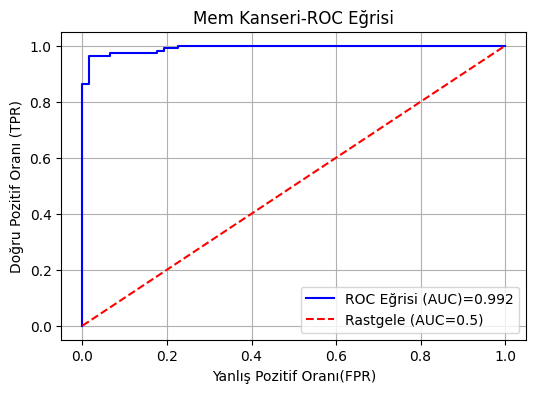

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
#Model ROC Eğrisi
plt.plot(fpr,tpr,color="blue",label=f"ROC Eğrisi (AUC)={auc:.3f}")

#Rastgele sınıflandırıc için diagonal (AUC=0.5) çizgisi
plt.plot([0,1],[0,1],color="red",linestyle="--",label="Rastgele (AUC=0.5)")
plt.xlabel("Yanlış Pozitif Oranı(FPR)")
plt.ylabel("Doğru Pozitif Oranı (TPR)")
plt.title("Mem Kanseri-ROC Eğrisi")
plt.legend()
plt.grid(True)
plt.show()

Sonuçlara baktığımızda ROC eğrisi ve AUC skoru modelin meme kanseri tahmininde başarılı olduğunu gösterir.ROC Grafiğinin sol üst köşeye yakın olması ve AUC skorunun 1'e yakın olması modelin pozitif örnekleri(iyi huyluları) negatif örneklerden(kötü huylulardan) çok iyi ayırdığını ifade eder.

## Örnek 2-) Kredi Kartı Dolandırıcılığı (Finans)

Bu örnekte kredi kartı dolandırıcılığı tespiti için örnek veri seti oluşturacaz.5000 işlemden oluşan bir veri seti oluşturup bu işlemlerin yüzde 2 si dolandırıcılık(pozitif sınıf) olarak işaretlensin.0 etiketi-->normal , 1 etiketi--> dolandırıcılık

In [39]:
from sklearn.datasets import make_classification

#5000 işlem, 10 sutunlu yapay veri(yüzde 2 dolandırıcılık)
X,y=make_classification(n_samples=5000,n_features=10,n_informative=5,weights=[0.98],random_state=31)
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.3,random_state=31)

#Logistic Regresyon modeli ile eğit
model=LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(confusion_matrix(y_test,y_pred))

#Test verisindeki pozitif sınıf(dolandırıcılık) olasılıklarını hesapla
y_scores=model.predict_proba(X_test)[:,1]

[[3405    1]
 [  86    8]]


y_scores=model.predict_proba(X_test)[:,1] : test işlemleri için her işlemin dolandırıcılık(pozitif sınıf) olma olasılığını hesaplar

In [40]:
y_scores

array([0.03100056, 0.00595382, 0.03335385, ..., 0.00050188, 0.00952072,
       0.00132928], shape=(3500,))

### ROC Eğrisi ve AUC Hesaplama

In [41]:
fpr,tpr,thresholds=roc_curve(y_test,y_scores)
auc=roc_auc_score(y_test,y_scores)
print(f"AUC skoru: {auc:.2f}")

AUC skoru: 0.81


### ROC Eğrisinin Çizimi

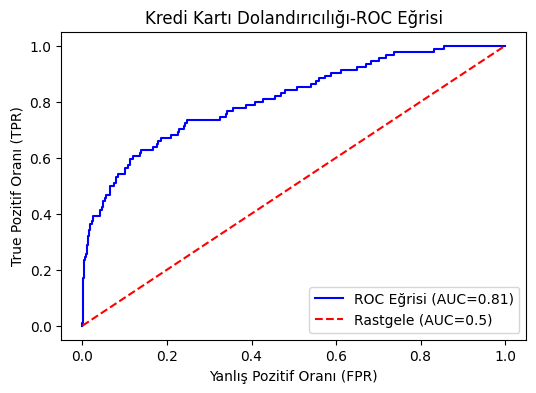

In [42]:
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,color="blue",label=f"ROC Eğrisi (AUC={auc:.2f})")
plt.plot([0,1],[0,1],color="red",linestyle="--",label="Rastgele (AUC=0.5)")
plt.xlabel("Yanlış Pozitif Oranı (FPR)")
plt.ylabel("True Pozitif Oranı (TPR)")
plt.title("Kredi Kartı Dolandırıcılığı-ROC Eğrisi")
plt.legend(loc="lower right")
plt.show()

## Örnek 3-) Hastalık Teşhisi (Sağlık)

Diyelim ki bir doktor, hastaların belirli bir hastalığa sahip olup olmadığını tahmin etmeye çalışıyor.

### Kavramlar:

* Pozitif: Hastanın hastalığa sahip olduğunu söyleme
* Negatif: Hastanın hastalığa sahip olmadığını söyleme
* Gerçek Pozitif(TP): Hasta gerçekten hasta ve biz de "hasta" dedik (Doğru teşhis)
* Yanlış Pozitif(FP): Hasta aslında sağlıklı ama biz "hasta" dedik(yanlış alarm)
* Gerçek Negatif(TN): Hasta gerçekten sağlıklı ve biz de "sağlıklı" dedik(Doğru teşhis)
* Yanlış Negatif(FN): Hasta aslında hasta ama biz "sağlıklı" dedik(kaçan teşhis)

### ROC Eğrisi Nasıl Çalışır:

* Model her hasta için bir "hasta olma olasılığı" üretir(0-1 arası değer)
* Biz de bir eşik değeri belirleriz (örneğin 0.5)
* Eşik değerinden yüksek olasılıkları "hasta", düşük olasılıklar "sağlıklı" olarak sınıflandırılır
" ROC eğrisi farklı eşik değerlerinde doğruluk oranlarımızın nasıl değiştiğini gösterir

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve

In [44]:
#Örnek veri oluştur(Hasta bilgileri)
#1000 hasta ve ehr hasta için 5 farklı özellik(örn: ateş,tansiyon)
X,y=make_classification(n_samples=1000,n_features=5,random_state=31)

#Veriyi eğitim ve test olarak ayır
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=31)

#Logistic Regresyon modeli oluştur ve fit et
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(confusion_matrix(y_test,y_pred))

#Test verileri için tahmin olasılıkları
y_scores=model.predict_proba(X_test)[:,1]

#ROC eğrisi için gerekli değerleri hesapla
fpr,tpr,thresholds=roc_curve(y_test,y_scores)

#AUC değerini hesapla
auc=roc_auc_score(y_test,y_scores)

[[128  16]
 [ 10 146]]


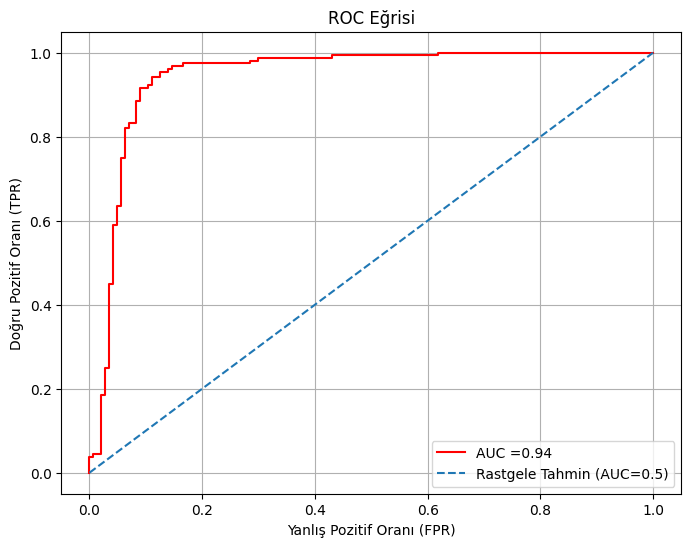

In [45]:
#Roc eğrisini çiz
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,color="red",label=f"AUC ={auc:.2f}")
plt.plot([0,1],[0,1],"--",label="Rastgele Tahmin (AUC=0.5)")
plt.xlabel("Yanlış Pozitif Oranı (FPR)")
plt.ylabel("Doğru Pozitif Oranı (TPR)")
plt.title("ROC Eğrisi")
plt.legend()
plt.grid(True)
plt.show()

In [46]:
#Eşik değerlerii işaretle
thresholds_mark=[0.2,0.5,0.8]
thresholds_indices=[np.abs(thresholds-i).argmin() for i in thresholds_mark]

In [47]:
thresholds_indices

[np.int64(37), np.int64(28), np.int64(16)]

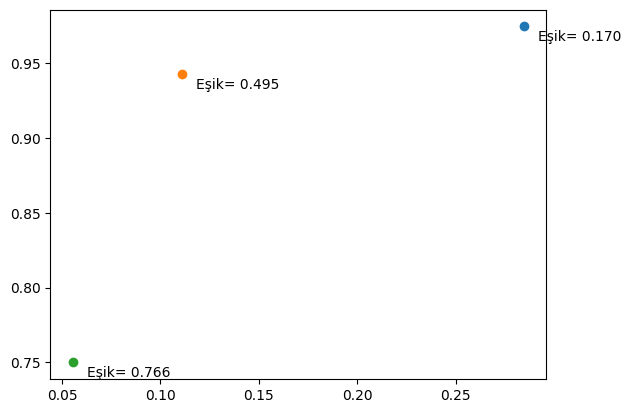

In [48]:
for idx in thresholds_indices:
    plt.plot(fpr[idx],tpr[idx],"o")
    plt.annotate(f"Eşik= {thresholds[idx]:.3f}",
                 (fpr[idx],tpr[idx]),
                 xytext=(10,-10),
                 textcoords="offset points")
    

plt.show()

In [49]:
#En uygun eşik değerlerini bul
#Youden's J istatiği kullan. TPR-FPR değerini maksimize eden değer
j_scores=tpr-fpr
best_threshold_idx=np.argmax(j_scores)
best_threshold=thresholds[best_threshold_idx]
print(f"En uygun eşik değeri:{best_threshold:.3f}")
print("Bu eşik değerinde:")
print(f"Gerçek Pozitif Oranı(TPR): {tpr[best_threshold_idx]:.2f}")
print(f"Yanlık POzitif Oranı (FPR): {fpr[best_threshold_idx]:.2f}")
print(f"AUC: {auc:.2f}")

En uygun eşik değeri:0.495
Bu eşik değerinde:
Gerçek Pozitif Oranı(TPR): 0.94
Yanlık POzitif Oranı (FPR): 0.11
AUC: 0.94


In [50]:
#Tablo ile gösterim
print("Farklı eşik değeri için sonuçlar")
print("--"*52)
print("Eşik Değeri | TPR(Duyarlılık) | FPR(1-Özgüllük) | Doğru Pozitifler | Yanlış Pozitifler")
print("--"*52)

for i in [0.2,0.3,0.4,0.5,0.6,0.7,0.8]:
    #En yakın eşik değerlerini bul
    idx=np.abs(thresholds-i).argmin()

    #Bu eşik değerinde tahminler
    predictions=(y_scores >= thresholds[idx].astype(int))

    #Doğru ve yanlış pozitif sayıları
    tp=np.sum((predictions==1) & (y_test==1))
    fp=np.sum((predictions==1) & (y_test==0)) 
    
    print(f"{thresholds[idx]:.2f}          | {tpr[idx]:.3f}           | {fpr[idx]:.3f}            |{tp}/{np.sum(y_test==1)}            | {fp}/{np.sum(y_test==0)}")


Farklı eşik değeri için sonuçlar
--------------------------------------------------------------------------------------------------------
Eşik Değeri | TPR(Duyarlılık) | FPR(1-Özgüllük) | Doğru Pozitifler | Yanlış Pozitifler
--------------------------------------------------------------------------------------------------------
0.17          | 0.974           | 0.285            |156/156            | 144/144
0.29          | 0.968           | 0.167            |156/156            | 144/144
0.39          | 0.955           | 0.139            |156/156            | 144/144
0.50          | 0.942           | 0.111            |156/156            | 144/144
0.61          | 0.917           | 0.090            |156/156            | 144/144
0.70          | 0.821           | 0.062            |156/156            | 144/144
0.77          | 0.750           | 0.056            |156/156            | 144/144


# Model Değerlendirmesini Anlamak

## ROC Eğrisi Ne Anlatır?